In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "units=Imperial"
api = "&APPID=" + api_key

In [14]:
# Creates variable for response code then prints response code to the console
response = requests.get(url + unit + api).json()
print(response)

{'cod': '400', 'message': 'Nothing to geocode'}


In [15]:
# Creates dictionary for data to be stored from the api calls
city_data = {"City": [],
              "Lat": [],
              "Lng": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}

MINUTE = 60

In [19]:
# Decorator that limits "call_api" function to 60 api calls per minute
def call_api():
    
    # A loop that repeats an api call with dynamic endpoints then adds data retrieved from each api call into "city_data" dictionary
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()

        try:
            print("Processing city " + str(i) + ": " + city["name"])

            city_data["City"].append(city["name"])
            city_data["Lat"].append(city["coord"]["lat"])
            city_data["Lng"].append(city["coord"]["lon"])
            city_data["Max Temp"].append(city["main"]["temp_max"])
            city_data["Humidity"].append(city["main"]["humidity"])
            city_data["Cloudiness"].append(city["clouds"]["all"])
            city_data["Wind Speed"].append(city["wind"]["speed"])
            city_data["Country"].append(city["sys"]["country"])
            city_data["Date"].append(city["dt"])

        except:
            print("Incomplete record. Skipping city instance...")
            pass
    print("Data retrieval is complete.")
    
call_api()

Processing city 0: Ancud
Processing city 1: Hithadhoo
Processing city 2: Busselton
Processing city 3: Tuktoyaktuk
Incomplete record. Skipping city instance...
Processing city 5: Nikolskoye
Processing city 6: Rikitea
Processing city 7: Mataura
Incomplete record. Skipping city instance...
Processing city 9: Kalengwa
Processing city 10: Ushuaia
Processing city 11: Puerto Ayora
Processing city 12: Mahébourg
Incomplete record. Skipping city instance...
Processing city 14: Hasaki
Processing city 15: Barrow
Processing city 16: Fairbanks
Processing city 17: Punta Arenas
Processing city 18: Øksfjord
Processing city 19: Boralday
Processing city 20: Cape Town
Processing city 21: Jevnaker
Processing city 22: Dobrinka
Processing city 23: Guane
Processing city 24: Codrington
Processing city 25: Bredasdorp
Processing city 26: Atambua
Processing city 27: Mehamn
Processing city 28: Hilo
Processing city 29: Avarua
Processing city 30: Saint Paul Harbor
Processing city 31: Bambous Virieux
Processing city 

Processing city 260: Khovd
Processing city 261: Makkah al Mukarramah
Incomplete record. Skipping city instance...
Processing city 263: Constitución
Processing city 264: Kirakira
Incomplete record. Skipping city instance...
Processing city 266: San Cristobal
Processing city 267: Joshīmath
Processing city 268: Nola
Processing city 269: Katsuura
Processing city 270: Hobbs
Processing city 271: Esperance
Processing city 272: Provideniya
Processing city 273: Sivas Province
Processing city 274: Souillac
Processing city 275: Chernyshevskiy
Processing city 276: Maués
Processing city 277: Tautira
Processing city 278: Borova
Processing city 279: Carinhanha
Incomplete record. Skipping city instance...
Processing city 281: Lakatoro
Processing city 282: Chapais
Processing city 283: Gejiu
Processing city 284: Yagodnoye
Processing city 285: Faanui
Processing city 286: Fukuechō
Processing city 287: Barcelos
Processing city 288: Pevek
Processing city 289: Kavieng
Processing city 290: Red Wing
Processing

Processing city 521: Peleduy
Processing city 522: Moindou
Processing city 523: Los Llanos de Aridane
Incomplete record. Skipping city instance...
Processing city 525: Nha Trang
Processing city 526: Harper
Processing city 527: Petropavlovsk-Kamchatskiy
Processing city 528: Oranjestad
Processing city 529: Ixtapa
Processing city 530: Maxixe
Processing city 531: Troitskoye
Processing city 532: Kazachinskoye
Processing city 533: Farmington
Processing city 534: Kokopo
Processing city 535: Usinsk
Processing city 536: Oktyabr'skoye
Processing city 537: Port Hope
Processing city 538: Yemel'yanovo
Processing city 539: Karasjok
Processing city 540: Aras
Processing city 541: Nemuro
Processing city 542: Mutatá
Processing city 543: Leh
Processing city 544: Jiayuguan City
Processing city 545: Viedma
Processing city 546: Shakawe
Processing city 547: Jūnāgarh
Processing city 548: Currais Novos
Processing city 549: Shar
Processing city 550: Manadhoo
Processing city 551: Puri
Processing city 552: Vanavar

In [41]:
# Creates table/DataFrame from the "city_data" dictionary
city_data_df = pd.DataFrame(city_data)

# Exports DataFrame as a csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.87,-73.82,59.00,66,75,11.41,CL,1603908709
1,Hithadhoo,-0.60,73.08,83.64,72,20,11.14,MV,1603908672
2,Busselton,-33.65,115.33,55.99,49,0,12.28,AU,1603908710
3,Tuktoyaktuk,69.45,-133.04,19.40,92,90,19.46,CA,1603908680
4,Nikolskoye,59.70,30.79,46.99,87,20,6.71,RU,1603908710


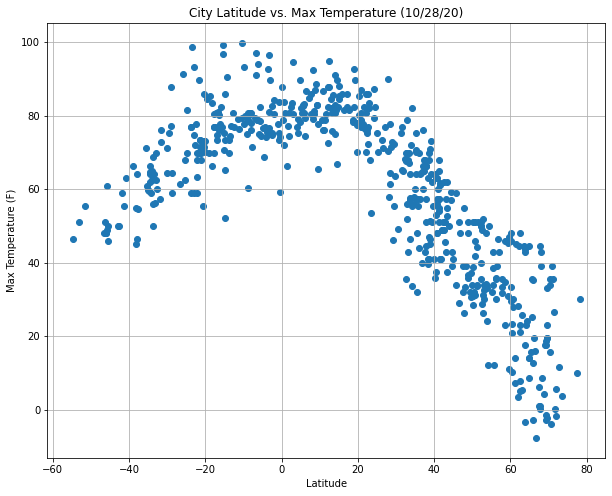

In [42]:
# Latitude vs. Temperature Plot

lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.figure(figsize=(10,8))
plt.scatter(lat, max_temp, linewidths=1, marker="o")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Images/fig1.png")

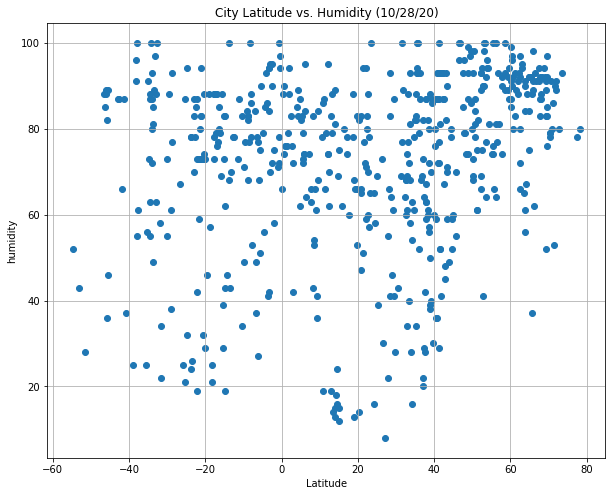

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(lat, humidity, linewidths=1, marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid(True)

plt.savefig("Images/fig2.png")

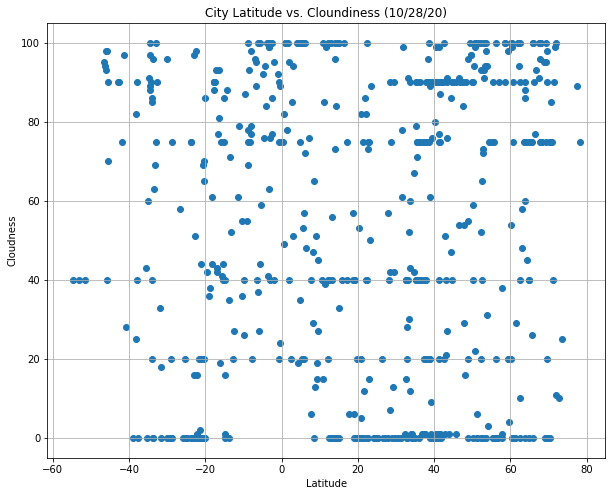

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(lat, cloudiness, linewidths=1, marker="o")

plt.title("City Latitude vs. Cloundiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudness")
plt.grid(True)

plt.savefig("Images/fig3.png")

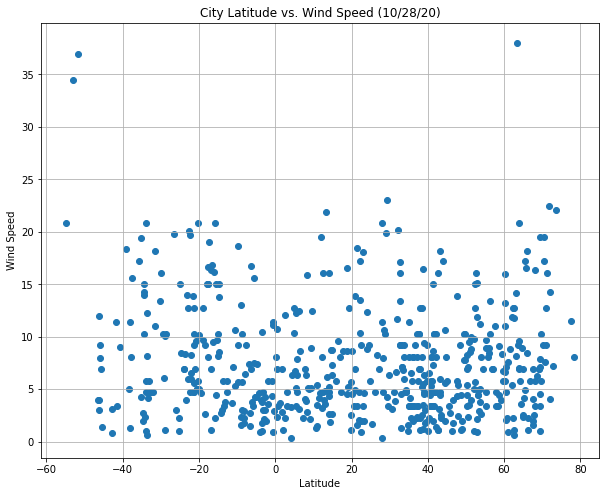

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(lat, wind_speed, linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig("Images/fig4.png")